In [1]:
from __future__ import print_function
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.version.__version__

'1.6.0'

In [3]:
shape = (2,3)

In [4]:
X_rand = torch.rand(shape) # this is psuedo random numbers generated from uniform distribution [0,1]
X_randn = torch.randn(shape) # this generates psuedo random numbers from standard normal distribution
X_randperm = torch.randperm(10) # this generates psuedo random intergers from 0 to n-1
X_ones = torch.ones(shape)
X_zeros = torch.zeros(shape)
X_eye = torch.eye(2,3)

In [5]:
print(X_rand)
print(X_randn)
print(X_randperm)
print(torch.argmin(X_rand,dim=1)) # this returns the indices of minimum value in the argument tensor, serached by rows
print(torch.argmax(X_randn,dim=0)) # this returns the indices of maximum value in the argument tensor, serached by colunms
print(X_ones)
print(X_zeros)
print(X_eye)

tensor([[0.9792, 0.7624, 0.8077],
        [0.5812, 0.5710, 0.8839]])
tensor([[ 1.0053,  0.4050,  1.7793],
        [ 0.3208, -0.2541, -0.4931]])
tensor([1, 3, 0, 5, 2, 7, 6, 9, 4, 8])
tensor([1, 1])
tensor([0, 0, 0])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 0., 0.],
        [0., 1., 0.]])


In [6]:
print(X_rand.dtype)

torch.float32


In [7]:
X_zero_2 = torch.zeros_like(X_eye,dtype=torch.double)
print(X_zero_2)
print(X_zero_2.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)
torch.float64


In [8]:
x = [6,6,6,8,8,8,5,2,0]
print(x)
xt = torch.tensor(x,dtype=torch.float)
print(xt)
print(type(x))
print(type(xt))
print(xt.dtype)
y = xt.tolist() # this converts the pytorch tensor back to a python list
print(y)
len(y)

[6, 6, 6, 8, 8, 8, 5, 2, 0]
tensor([6., 6., 6., 8., 8., 8., 5., 2., 0.])
<class 'list'>
<class 'torch.Tensor'>
torch.float32
[6.0, 6.0, 6.0, 8.0, 8.0, 8.0, 5.0, 2.0, 0.0]


9

In [11]:
x1 = torch.linspace(0,1,steps=11,dtype=torch.float) # this generates [steps=11] many numbers, range from 0 to 1 
x2 = torch.arange(0,1,0.1) # this generates (1-0)/0.1=10 numbers range from [start=0, end=1), note that the interval is not closed on the right
y1 = torch.logspace(0,10,steps=11)
print(x1)
print(x2)
print(y1)

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])
tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000])
tensor([1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04, 1.0000e+05,
        1.0000e+06, 1.0000e+07, 1.0000e+08, 1.0000e+09, 1.0000e+10])


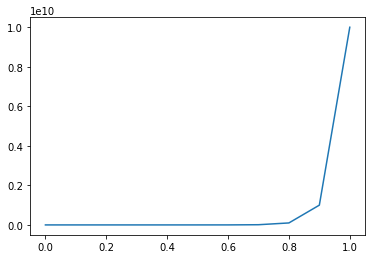

In [12]:
plt.plot(x1,y1) # this generates the cureve of y1 agaisnt x1
plt.show()      # this show the genrerated curve    

In [13]:
A=np.array([[2,1],[3,4]])
At=torch.from_numpy(A)
print(torch.cat((At,At),0)) # concatenate tensor At over columns 
print(torch.cat((At,At),1)) # concatenate tensor At over rows

tensor([[2, 1],
        [3, 4],
        [2, 1],
        [3, 4]], dtype=torch.int32)
tensor([[2, 1, 2, 1],
        [3, 4, 3, 4]], dtype=torch.int32)


In [14]:
B = torch.rand(2,5)
S = torch.chunk(B,2,1) # this splits the tensor B into two adjcent tensors by rows
print(S[0])
print(S[1]) # note that if the number of splits cannot be evely divided by the columns of rows, 

tensor([[0.5797, 0.6876, 0.4676],
        [0.9898, 0.4373, 0.8782]])
tensor([[0.1078, 0.3501],
        [0.8442, 0.5018]])


In [15]:
AA = torch.tensor([[11,12,13],[21,22,23]])
id_0 = torch.LongTensor([[1,0,1],[0,1,0]])
id_1 = torch.LongTensor([[2,0,1],[1,2,0]])
print('this is the original')
print(AA)
print('\nthese are the collected, note how the new entries are chosen as per id_0 and id_1')
print(torch.gather(AA,0,id_0))
print(torch.gather(AA,1,id_1))
id_row = torch.LongTensor([1,0]) # indices for row selection
id_col = torch.LongTensor([1,2,0]) # indices for col selection
print('\nnote how rows are chosen as per id_row')
print(torch.index_select(AA,0,id_row))
print('\nnote how columns are chosen as per id_col')
print(torch.index_select(AA,1,id_col))

this is the original
tensor([[11, 12, 13],
        [21, 22, 23]])

these are the collected, note how the new entries are chosen as per id_0 and id_1
tensor([[21, 12, 23],
        [11, 22, 13]])
tensor([[13, 11, 12],
        [22, 23, 21]])

note how rows are chosen as per id_row
tensor([[21, 22, 23],
        [11, 12, 13]])

note how columns are chosen as per id_col
tensor([[12, 13, 11],
        [22, 23, 21]])


In [16]:
c = torch.randint(0,2,(5,)) # this generates 5 random integers in [0,2)
print(c)
print(torch.nonzero(c)) # this gives you which index in the 

tensor([0, 0, 1, 1, 0])
tensor([[2],
        [3]])


C:\Users\wangyuan\anaconda3\envs\workenv-37-1\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:766.)
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
# torch.split can split a tensor into smaller ones, 
# which is more flexible than torch.chunk, note the differences
C = torch.cat((B,B),0)
print('this is the original tensor')
print(C)
print('\nthis splits into chunks of size of 2 rows')
print(torch.split(C,2))
print('\nthis splits into chunks of size of 3 rows')
print(torch.split(C,3))
print('\nthis splits into chunks of size of different rows')
print(torch.split(C,[1,2,1]))

this is the original tensor
tensor([[0.5797, 0.6876, 0.4676, 0.1078, 0.3501],
        [0.9898, 0.4373, 0.8782, 0.8442, 0.5018],
        [0.5797, 0.6876, 0.4676, 0.1078, 0.3501],
        [0.9898, 0.4373, 0.8782, 0.8442, 0.5018]])

this splits into chunks of size of 2 rows
(tensor([[0.5797, 0.6876, 0.4676, 0.1078, 0.3501],
        [0.9898, 0.4373, 0.8782, 0.8442, 0.5018]]), tensor([[0.5797, 0.6876, 0.4676, 0.1078, 0.3501],
        [0.9898, 0.4373, 0.8782, 0.8442, 0.5018]]))

this splits into chunks of size of 3 rows
(tensor([[0.5797, 0.6876, 0.4676, 0.1078, 0.3501],
        [0.9898, 0.4373, 0.8782, 0.8442, 0.5018],
        [0.5797, 0.6876, 0.4676, 0.1078, 0.3501]]), tensor([[0.9898, 0.4373, 0.8782, 0.8442, 0.5018]]))

this splits into chunks of size of different rows
(tensor([[0.5797, 0.6876, 0.4676, 0.1078, 0.3501]]), tensor([[0.9898, 0.4373, 0.8782, 0.8442, 0.5018],
        [0.5797, 0.6876, 0.4676, 0.1078, 0.3501]]), tensor([[0.9898, 0.4373, 0.8782, 0.8442, 0.5018]]))


In [27]:
# using function torch.unbind(x,0 or 1) can decompose a tensor along rows or columns
CT = C.transpose(0,1) # or use C.t() or =torch.tarnspose(C,0,1)
print('this is the tensor we gonna decomose, the transpose of C')
print(CT)
print('\nnow we decompose it into serperate tensors which are rows of the original tensor')
print(torch.unbind(CT,0))
print('\nnow we decompose it into serperate tensors which are columns of the original tensor')
print(torch.unbind(CT,1))

this is the tensor we gonna decomose, the transpose of C
tensor([[0.5797, 0.9898, 0.5797, 0.9898],
        [0.6876, 0.4373, 0.6876, 0.4373],
        [0.4676, 0.8782, 0.4676, 0.8782],
        [0.1078, 0.8442, 0.1078, 0.8442],
        [0.3501, 0.5018, 0.3501, 0.5018]])

now we decompose it into serperate tensors which are rows of the original tensor
(tensor([0.5797, 0.9898, 0.5797, 0.9898]), tensor([0.6876, 0.4373, 0.6876, 0.4373]), tensor([0.4676, 0.8782, 0.4676, 0.8782]), tensor([0.1078, 0.8442, 0.1078, 0.8442]), tensor([0.3501, 0.5018, 0.3501, 0.5018]))

now we decompose it into serperate tensors which are columns of the original tensor
(tensor([0.5797, 0.6876, 0.4676, 0.1078, 0.3501]), tensor([0.9898, 0.4373, 0.8782, 0.8442, 0.5018]), tensor([0.5797, 0.6876, 0.4676, 0.1078, 0.3501]), tensor([0.9898, 0.4373, 0.8782, 0.8442, 0.5018]))


In [53]:
# Below shows how to do tensor sum
print('\nhere is the tensor A, an zero-tensor plus 2')
Y1=torch.add(X_zeros,2) # this add a value of 2 into every single element in X_zeros
print(Y1)
print(Y1.dtype)

print('\nconvert A from float32 to int8')
Y1 = Y1.char() # convert Y1 to 8-bit signed int, other e.g., byte, shor, long, float, double
print(Y1)
print(Y1.dtype)

print('\nhere is the tensor B')
print(X_zeros)
Y2=torch.add(X_zeros,X_eye,alpha=0.5) # this add X_eye*0.5 into tensor X_zeros
print('\nhere is the tensor B plus 0.5x an identity tensor')
print(Y2)

print('\nhere we got A+B')
print(torch.add(Y1,Y2))
print(torch.add(Y1,Y2).dtype) # note that the add operation cast int into float
print('note that the result is of float32') 


here is the tensor A, an zero-tensor plus 2
tensor([[2., 2., 2.],
        [2., 2., 2.]])
torch.float32

convert A from float32 to int8
tensor([[2, 2, 2],
        [2, 2, 2]], dtype=torch.int8)
torch.int8

here is the tensor B
tensor([[0., 0., 0.],
        [0., 0., 0.]])

here is the tensor B plus 0.5x an identity tensor
tensor([[0.5000, 0.0000, 0.0000],
        [0.0000, 0.5000, 0.0000]])

here we got A+B
tensor([[2.5000, 2.0000, 2.0000],
        [2.0000, 2.5000, 2.0000]])
torch.float32
note that the result is of float32


In [69]:
# below shows how to do multiplication and matrix multiplcation
print('here we multiply an int8 tensor by 1.5 to get tensor C')
Z = torch.mul(Y1,1.5) # torch.mul() do entry-wise multiplication
print(Z)
print(Z.dtype)
print('note that entry-wise multiplication cast result to the dtype of higher level')

# now let's do matrix multiplcation, two tensors must be same dtype
print('\nrecall that this is tensor B, it is float32')
print(Y2)
print('\nnow we multiply B by tensor C, B X C^T')
print('note that tow tensors to be multiplied must have same dtype')
Z1 = torch.matmul(Y2,Z.t())
print(Z1)

here we multiply an int8 tensor by 1.5 to get tensor C
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.float32
note that entry-wise multiplication cast result to the dtype of higher level

recall that this is tensor B, it is float32
tensor([[0.5000, 0.0000, 0.0000],
        [0.0000, 0.5000, 0.0000]])

now we multiply B by tensor C, B X C^T
note that tow tensors to be multiplied must have same dtype
tensor([[1.5000, 1.5000],
        [1.5000, 1.5000]])


In [87]:
# now let's do entry-wise exponential and log functions
D = torch.tensor([[-0.7628, 0.7653],[0.5497, 0.8862]])
print('this is the tensor wo gonna use')
print(D)
exp_D = torch.exp(D)
print('\nnow we compute expoential function values of an input tensor')
print(exp_D)

# now we restrict the elemtns of D to be positive to compute log funciton
D1 = torch.clamp(D,min=0.1)
print('\nnow restrict the elemtns of D to be no less than 0.1')
print(D1)
print('then compute log values')
print(torch.log(D1))

this is the tensor wo gonna use
tensor([[-0.7628,  0.7653],
        [ 0.5497,  0.8862]])

now we compute expoential function values of an input tensor
tensor([[0.4664, 2.1496],
        [1.7327, 2.4259]])

now restrict the elemtns of D to be no less than 0.1
tensor([[0.1000, 0.7653],
        [0.5497, 0.8862]])
then compute log values
tensor([[-2.3026, -0.2675],
        [-0.5984, -0.1208]])

we can also compute powers of a tensor using torch.pow
tensor([[0.5819, 0.5857],
        [0.3022, 0.7854]])


In [91]:
print('\nwe can also compute entry-wise powers of a tensor using torch.pow')
print(D)
print('below is the entry-wise squares of tensor D')
print(torch.pow(D,2))
print('\nand also computing the entry-wise square roots, e.g. the square-root of a diagonal matrix of 2 is')
print(torch.sqrt(torch.mul(torch.eye(2),2)))


we can also compute entry-wise powers of a tensor using torch.pow
tensor([[-0.7628,  0.7653],
        [ 0.5497,  0.8862]])
below is the entry-wise squares of tensor D
tensor([[0.5819, 0.5857],
        [0.3022, 0.7854]])

and also computing the entry-wise square roots, e.g. the square-root of a diagonal matrix of 2 is
tensor([[1.4142, 0.0000],
        [0.0000, 1.4142]])


In [93]:
# now let's compute entry-wise value of sigmoid function
print('recall that we are using tensor D which is')
print(D)
print('and its entry-wise sigmoid value is')
print(torch.sigmoid(D))

recall that we are using tensor D which is
tensor([[-0.7628,  0.7653],
        [ 0.5497,  0.8862]])
and its entry-wise sigmoid value is
tensor([[0.3180, 0.6825],
        [0.6341, 0.7081]])
